# 09. fastText

메타에서 개발한 오픈소스 임베딩 모델로, 텍스트 분류 및 텍스트 마이닝을 위한 알고리즘

단어와 문장을 벡터로 변환하는 기술을 기반으로 하며, 이를 통해 머신러닝 알고리즘이 텍스트 데이터를 분석하고 이해하는 데 사용된다

이러한 벡터와 기술은 Word2Vec과 유사하지만 , fastText는 단어의 하위 단어를 고려하므로 더 높은 정확도와 성능을 제공한다

하위 단어를 고려하기 위해 N-gram을 사용해 단어를 분해하고 벡터화하는 방법으로 동작한다

단어의 벡터화를 위해 <,>와 같은 특수기호를 사용하여 단어의 시작과 끝을 나타낸다

이러한 기호는 단어의 하위 문자열을 고려하는데 중요한 역할을 한다

기호가 추가된 단어는 N-gram을 사용하여 하위단어 집합(subword set)으로 분해된다

분해된 하위 단어 집합에는 나눠지지 않은 단어 자신도 포함되며, 단어 집합이 만들어지면 각 하위 단어는 고유한 벡터값을 갖게 된다

이러한 하위 단어 벡터들은 단어의 벡터 표현을 구성하며, 이를 사용하여 자연어 처리 작업을 수행

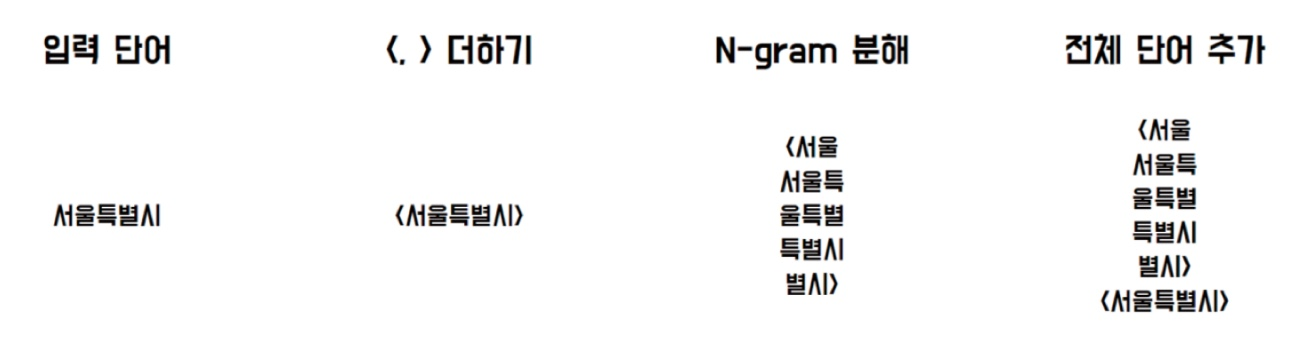

각 하위 단어의 임베딩 벡터를 구하고, 이를 모두 합산하여 입력 단어의 최종 임베딩 벡터를 계산

일반적으로 fastText는 다양한 N-gram을 적용해 입력 토큰을 분해하고 하위 단어 벡터를 구성함으로써 단어의 부분 문자열을 고려하는 유연하고 정확한 하위 단어 집합을 생성한다

즉 같은 하위 단어를 공유하는 단어끼리는 정보를 공유해 학습할 수 있다

이를 통해 비슷한 단어끼리는 비슷한 임베딩 벡터를 갖게 되어, 단어간 유사도를 높일 수 있다

또한 OOV 단어도 하위 단어로 나누어 임베딩을 계산할 수 있게 된다

이렇게 하위 단어 기반의 임베딩 방법을 사용하면 말뭉치에 등장하지 않은 단어라도 유사한 하위 단어를 가지고 있으면 유사한 임베딩 벡터를 갖게 된다

fastText 모델도 CBoW와 skip-gram으로 구성되며 네거티브 샘플링 기법을 사용해 학습한다

Word2Vec 모델은 기본 단위로 모델을 학습했다면 fastText는 하위 단어로 학습한다

그러므로 조금 더 복잡한 과적ㅇ이 필요하고 모든 하위 단어를 갖는 임베딩 계층이 필요하다

In [1]:
from Korpora import Korpora


corpus = Korpora.load("kornli")
corpus_texts = corpus.get_all_texts() + corpus.get_all_pairs()
tokens = [sentence.split() for sentence in corpus_texts]

print(tokens[:3])


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : KakaoBrain
    Repository : https://github.com/kakaobrain/KorNLUDatasets
    References :
        - Ham, J., Choe, Y. J., Park, K., Choi, I., & Soh, H. (2020). KorNLI and KorSTS: New Benchmark
           Datasets for Korean Natural Language Understanding. arXiv preprint arXiv:2004.03289.
           (https://arxiv.org/abs/2004.03289)

    This is the dataset repository for our paper
    "KorNLI and KorSTS: New Benchmark Datasets for Korean Natural Language Understanding."
    (https://arxiv.org/abs/2004.03289)
    We introduce KorNLI and KorSTS, which are NLI and STS datasets in Korean.

    # License
    Creative Commons Attribution-ShareAlike license (CC BY-SA 4.0)
    Details in https://creativecommons.org/licenses

[kornli] download multinli.train.ko.tsv: 83.6MB [00:26, 3.21MB/s]                              
[kornli] download snli_1.0_train.ko.tsv: 78.5MB [00:16, 4.69MB/s]                              
[kornli] download xnli.dev.ko.tsv: 516kB [00:01, 496kB/s]                             
[kornli] download xnli.test.ko.tsv: 1.04MB [00:01, 883kB/s]                             


[['개념적으로', '크림', '스키밍은', '제품과', '지리라는', '두', '가지', '기본', '차원을', '가지고', '있다.'], ['시즌', '중에', '알고', '있는', '거', '알아?', '네', '레벨에서', '다음', '레벨로', '잃어버리는', '거야', '브레이브스가', '모팀을', '떠올리기로', '결정하면', '브레이브스가', '트리플', 'A에서', '한', '남자를', '떠올리기로', '결정하면', '더블', 'A가', '그를', '대신하러', '올라가고', 'A', '한', '명이', '그를', '대신하러', '올라간다.'], ['우리', '번호', '중', '하나가', '당신의', '지시를', '세밀하게', '수행할', '것이다.']]


KorNLI는  한국어 자연어 추론을 위한 데이터세트

자연어 추론 :  두 개 이상의 문장이 주어졌을 때, 두 문장간의 관계를 분류하는 작업

이를 통해 문장의 함의 관계, 중립관계, 불일치 관계 중 어느 관계에 해당하는지 분류할 수 있다

get_all_texts와 get_all_pairs 메서드를 제공하는데

get_all_texts 메서드는 모든 문장을 튜플 형태로 반환하며, get_all_pairs 메서드는 입력 문장과 쌍을 이루는 대응 문장을 튜플 형태로 반환한다

단어 임베딩 모델을 학습하는게 목적이므로 두 문장의 관계를 고려하지 않고 입력 문장과 대응 문장 전체를 사용해 학습을 진행

Word2Vec 모델과  다르게 fastText는 입력 단어의 구조적 특징 학습 가능

따라서 형태소 분석기를 통해 토큰화 하지않고 띄어쓰기 기준으로 단어를 토큰화해 학습 진행

In [2]:
from gensim.models import FastText


fastText = FastText(
    sentences=tokens,
    vector_size=128,
    window=5,
    min_count=5,
    sg=1,
    epochs=3,
    min_n=2,
    max_n=6
)

# fastText.save("../models/fastText.model")
# fastText = FastText.load("../models/fastText.model")

OOV 단어를 대상으로도 의미있는 임베딩 추출

In [3]:
oov_token = "사랑해요"
oov_vector = fastText.wv[oov_token]

print(oov_token in fastText.wv.index_to_key)
print(fastText.wv.most_similar(oov_vector, topn=5))

False
[('사랑해', 0.911825954914093), ('사랑', 0.8823807239532471), ('사랑한', 0.8763068318367004), ('사랑해서', 0.8431772589683533), ('사랑해.', 0.8386266827583313)]


wv.index_to_key 메서드는 학습된 단어사전을 나타내는 리스트를 의미한다

분해된 하위 단어 임베딩을 모두 합해 전체 토큰의 임베딩을 계산한다

그러므로 다른 단어에서 등장했던 하위 단어를 통해 토큰 임베딩을 계산할 수 있다

fastText는 oov 문제를 효과적으로 해결할 수 있다

특히 한국어와 같은 많은 언어는 형태적 구조를 갖고 있기 때문에 하위 단어로 나누어 임베딩을 학습하는 fastText의 접근 방식을 통해 OOV를 해결할 수 있다